<a href="https://colab.research.google.com/github/maxwillzq/algoTrading/blob/main/notebooks/chapter_4_individual_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 定义基本常数包括股票代码，时间

In [ ]:
# if use it in colab, please install it by yourself first
#!pip install git+https://github.com/maxwillzq/algoTrading.git

In [ ]:
import algotrading
import matplotlib.pyplot as plt
import pandas as pd
import yahoo_fin.news as sn
import yahoo_fin.stock_info as si
import numpy as np
import datetime as dt

In [ ]:
# collect data first
stock_name = "VIAC"
days = 2 * 365
unit = 1000000000 # Billion USD
st = algotrading.stock.Stock(stock_name)
st.read_data(days)
st.generate_more_data()
status, messages, result_dict = st.is_good_business()
print(f"{st.name} is a good business? \nAnswer: {status}")
if status == False:
    print("Reason:", messages)
    #print("result_dict", result_dict)

VIAC is a good business? 
Answer: False
Reason: ['fail: weak profit margin. profit margin = 9.58', 'fail: revenue growth yoy less than 10%.rate = 2.8']


# 2. 分析基本财务数据

In [ ]:
st = algotrading.stock.Stock(stock_name)

In [ ]:
finance_data = si.get_financials(stock_name)

In [ ]:
finance_data.keys()

dict_keys(['yearly_income_statement', 'yearly_balance_sheet', 'yearly_cash_flow', 'quarterly_income_statement', 'quarterly_balance_sheet', 'quarterly_cash_flow'])

In [ ]:
column_list = ['netIncome','grossProfit', 'ebit', 'totalRevenue']
yearly_income_statement = finance_data['yearly_income_statement'].T.sort_index()
print("Notes: the unit is Billion USD")
yearly_income_statement[column_list]/unit

Notes: the unit is Billion USD


Breakdown,netIncome,grossProfit,ebit,totalRevenue
endDate,,,,
2017-12-31,2.321,11.052,5.357,26.535
2018-12-31,3.455,11.026,5.486,26.425
2019-12-31,3.308,10.285,4.287,26.998
2020-12-31,2.422,10.293,4.506,25.285


In [ ]:
try:
    column_list = ['totalCashFromOperatingActivities','capitalExpenditures']
    yearly_cash_flow = finance_data['yearly_cash_flow'].T.sort_index()
    yearly_cash_flow[column_list]/unit
except:
    pass

In [ ]:
column_list = ['netIncome','grossProfit', 'ebit', 'totalRevenue']
quarterly_income_statement = finance_data['quarterly_income_statement'].T.sort_index()
quarterly_income_statement[column_list]/unit

Breakdown,netIncome,grossProfit,ebit,totalRevenue
endDate,,,,
2020-03-31,0.516,2.604,1.144,6.669
2020-06-30,0.481,2.790,1.451,6.275
2020-09-30,0.615,2.482,0.992,6.116
2020-12-31,0.810,2.417,0.918,6.225


In [ ]:
earnings = si.get_earnings(stock_name)
earnings["yearly_revenue_earnings"].set_index('date')
earnings["yearly_revenue_earnings"]/unit

,date,revenue,earnings
0,0.000002,26.535,2.321
1,0.000002,26.425,3.455
2,0.000002,26.998,3.308
3,0.000002,25.285,2.422


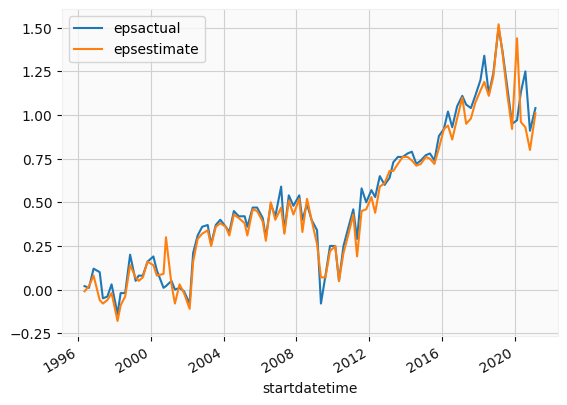

In [ ]:
earnings_history = si.get_earnings_history(stock_name)
earnings_history = pd.DataFrame(earnings_history)
earnings_history = earnings_history.set_index("startdatetime")
earnings_history = earnings_history.sort_index()
earnings_history.index = pd.to_datetime(earnings_history.index)
ax = earnings_history[["epsactual", "epsestimate"]].plot()
#earnings_history[["epssurprisepct"]].plot(secondary_y=True, ax=ax, marker='o')
#ax.set_ylabel('size')
plt.show()

In [ ]:
valuation = si.get_stats_valuation(stock_name)
valuation

,Unnamed: 0,As of Date: 4/5/2021Current,12/31/2020,9/30/2020,6/30/2020,3/31/2020
0,Market Cap (intraday) 5,28.70B,23.02B,17.37B,14.48B,8.81B
1,Enterprise Value 3,47.03B,41.42B,36.97B,34.27B,28.81B
2,Trailing P/E,11.97,17.33,12.91,7.85,2.64
3,Forward P/E 1,10.62,8.76,6.12,6.39,2.62
4,PEG Ratio (5 yr expected) 1,12.06,1.18,0.81,0.84,0.25
5,Price/Sales (ttm),1.09,0.89,0.65,0.53,0.31
6,Price/Book (mrq),1.86,1.58,1.24,1.07,0.65
7,Enterprise Value/Revenue 3,1.86,6.65,6.04,5.46,4.32
8,Enterprise Value/EBITDA 6,10.21,33.27,35.96,25.89,28.50


# 3. 分析师未来前景预测

In [ ]:
analysts_info = si.get_analysts_info(stock_name)
analysts_info.keys()

dict_keys(['Earnings Estimate', 'Revenue Estimate', 'Earnings History', 'EPS Trend', 'EPS Revisions', 'Growth Estimates'])

In [ ]:
analysts_info['Earnings Estimate']

,Earnings Estimate,Current Qtr. (Mar 2021),Next Qtr. (Jun 2021),Current Year (2021),Next Year (2022)
0,No. of Analysts,19.00,19.00,22.00,22.00
1,Avg. Estimate,1.15,1.10,4.04,4.24
2,Low Estimate,0.98,0.73,3.39,3.61
3,High Estimate,1.25,1.62,4.63,4.85
4,Year Ago EPS,1.13,1.25,4.20,4.04


In [ ]:
analysts_info['Growth Estimates']

,Growth Estimates,VIAC,Industry,Sector(s),S&P 500
0,Current Qtr.,1.80%,NaN,NaN,NaN
1,Next Qtr.,-12.00%,NaN,NaN,NaN
2,Current Year,-3.80%,NaN,NaN,NaN
3,Next Year,5.00%,NaN,NaN,NaN
4,Next 5 Years (per annum),-4.20%,NaN,NaN,NaN
5,Past 5 Years (per annum),13.89%,NaN,NaN,NaN


In [ ]:
try:
    print("Next earning date ", si.get_next_earnings_date(stock_name))
except:
    pass

Next earning date  2021-05-04 17:00:00


# 4. 股票技术面分析

(<Figure size 1200x900 with 10 Axes>,
  <matplotlib.axes._axes.Axes at 0x14c7d84c0>])

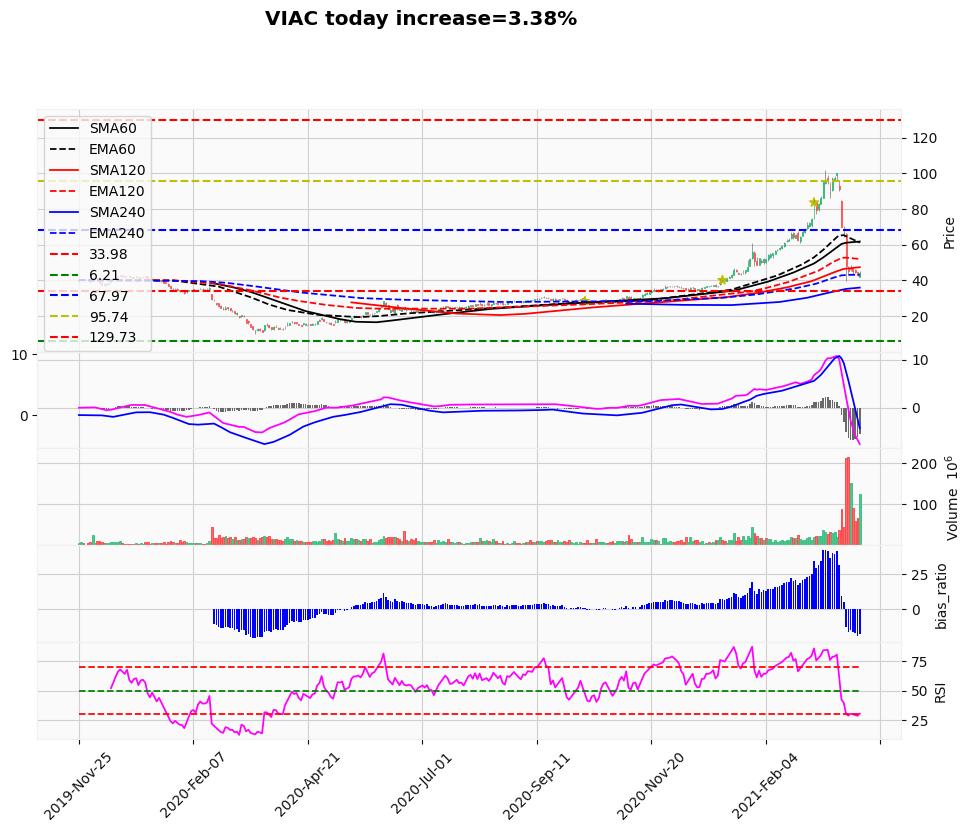

In [ ]:
st.read_data(days=500)
st.generate_more_data()
st.plot(mav=[60, 120, 240], image_name=stock_name + "_long", pivot_type="get_standard_pivot", interval=60)

<AxesSubplot:title={'center':'long term trend'}, xlabel='Date'>

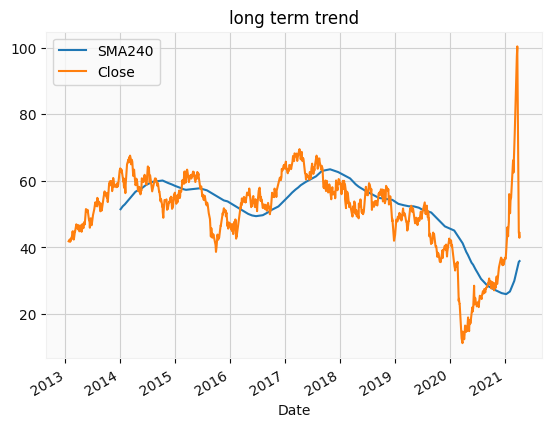

In [ ]:
st.read_data(days=3000)
st.df[["SMA240",'Close']].plot(title="long term trend")

(<Figure size 1200x900 with 10 Axes>,
  <matplotlib.axes._axes.Axes at 0x14d5dd0a0>])

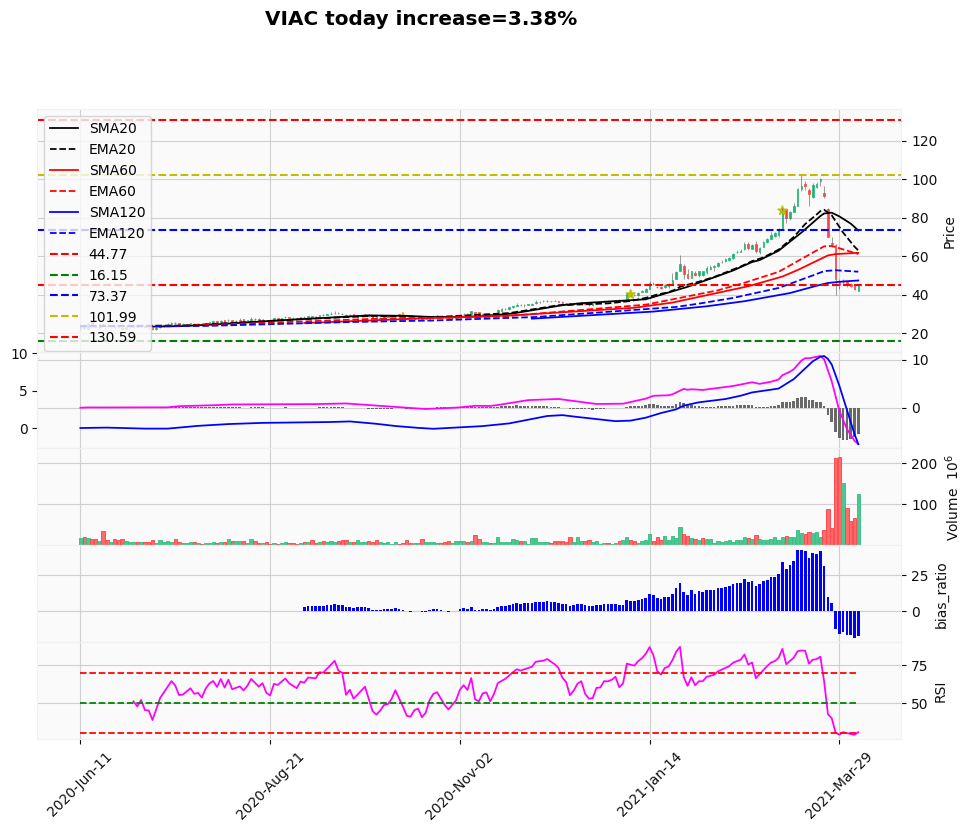

In [ ]:
st.read_data(days=300)
st.generate_more_data()
st.plot(mav=[20, 60, 120], image_name=stock_name + "_long", pivot_type="get_standard_pivot", interval=20)

(<Figure size 1200x900 with 10 Axes>,
  <matplotlib.axes._axes.Axes at 0x14df8f9d0>])

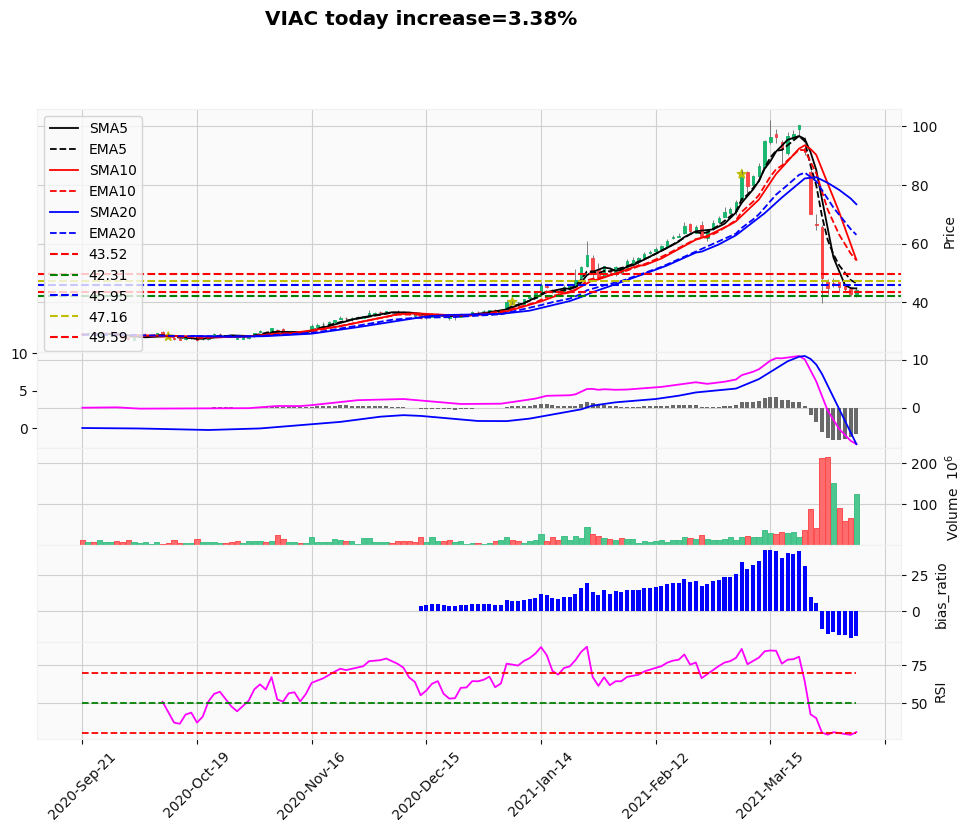

In [ ]:
st.read_data(days=200)
st.generate_more_data()
st.plot(mav=[5, 10, 20], image_name=stock_name + "_long", pivot_type="get_standard_pivot", interval=5)

In [ ]:
new_df = st.df.shift(-10)

In [ ]:
new_df = 

SyntaxError: invalid syntax (<ipython-input-50-a589509f7680>, line 1)

In [ ]:
si.get_day_most_active()

In [ ]:
df.ta.willr().plot(legend="b")